In [1]:
import numpy as np
import pandas as pd
import requests as req


1. 데이터를 수집할 페이지의 주소를 변수에 저장

In [3]:
naver_url = "https://www.naver.com"

In [5]:
# 웹문서(HTML)요청하기
# HTTP 상태코드
# 200: 정상 | 400~ : 사용자 요청 이슈 | 500~ : 서버 이슈
req.get(naver_url).text


'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

## 검색어 기반 요청하기

In [8]:
search_url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8"

# params :  웹 문서 요청 시, 특정 키워드를 보내는 속성
# - > 리턴되는 결과는 키워드에 맞는 웹 문서로 서버에서 응답해준다.
res = req.get(search_url,params={'query':'해물파전'})
res

<Response [200]>

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="해물파전 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'해물파전\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'해물파전\'의 네이버 통합검색 결과입니다."> <title>해물파전 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240314.css"> <link rel="stylesheet" type="text/css"
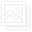
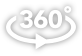
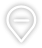

In [9]:
res.text

# 특정 키워드를 이용해서 검색된 결과를 출력하시오.(Google)

In [4]:
str1 = ""
google_url = f"https://www.google.com/search?&oq=%EB%8F%88%EA%B9%8C%EC%8A%A4&gs_lcrp=EgZjaHJvbWUyDAgAEEUYORixAxiABDIGCAEQABgDMgYIAhAAGAMyDQgDEAAYgwEYsQMYgAQyDQgEEC4YgwEYsQMYgAQyDQgFEAAYgwEYsQMYgAQyDQgGEC4YgwEYsQMYgAQyCggHEAAYsQMYgAQyDQgIEC4YgwEYsQMYgAQyCggJEAAYsQMYgATSAQoxMzI4NGowajE1qAIAsAIA&sourceid=chrome&ie=UTF-8"
res = req.get(google_url, params={"q":"돈까스"})

res

<Response [200]>

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#46024;&#44620;&#49828; - Google &#44160;&#49353;</title><script nonce="wKRXvqrLaWKU0H8WRhKMAA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
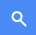
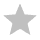
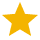
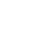
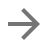
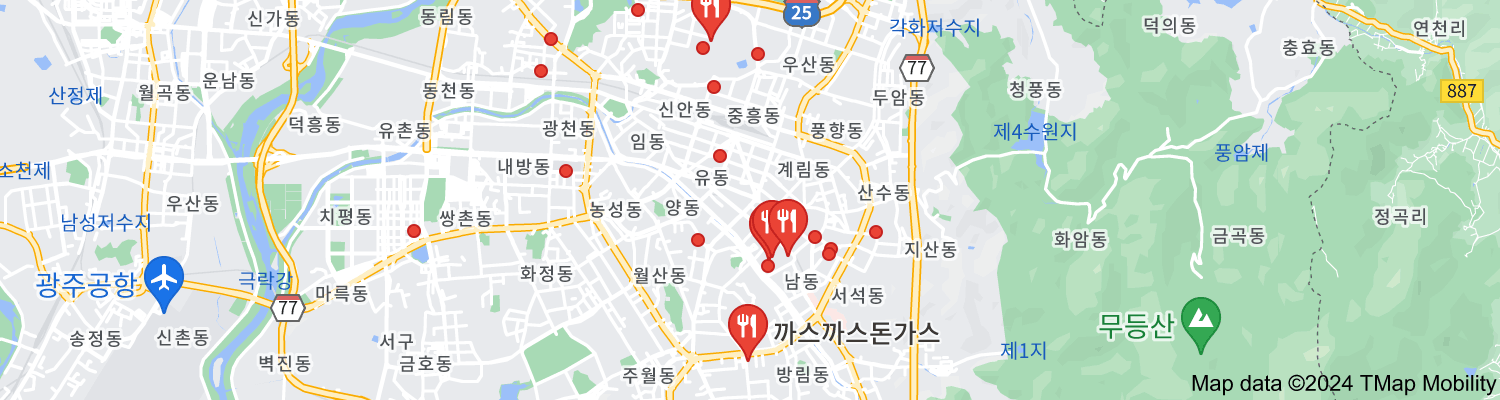
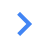

In [5]:
res.text

## 웹 문서 내 데이터 추출해 보기

In [6]:
from bs4 import BeautifulSoup as bs

In [7]:
# bs(변환할 데이터, 변환방식)
# 변환할 데이터 : XML or HTML 문자열 데이터
# 변환방식 : lxml(빠름) > html.parser(보통) > html5lib(느림)
html = bs(res.text, 'lxml')

In [8]:
type(res.text), type(html)

(str, bs4.BeautifulSoup)

In [10]:
#select_one(css선택자) : 하나의 html요소객체를 반환
html.select_one('title')

<title>돈까스 - Google 검색</title>

In [ ]:
# select(css선택자) : 여러 개의 HTML 요소객체를 리스트로 반환
html.select("")

#### 뉴스 데이터 수집

In [11]:
news_url = "https://n.news.naver.com/mnews/article/001/0014658230"
res = req.get(news_url)
html = bs(res.text,'lxml')
html

In [61]:
#불필요한 요소를 제거해주는 함수
html.select_one("#dic_area > span.end_photo_org").extract()
title = html.select_one("#title_area > span")
content = html.select_one("#dic_area")

In [62]:
print(title.text)

성남시-성균관대, 팹리스·AI혁신연구센터 6월부터 운영


In [63]:
print(content.text.replace('\n',''))

(성남=연합뉴스) 이우성 기자 = 경기 성남시는 29일 성균관대학교와 시스템반도체 및 AI 산업의 산·학·연·관 혁신 생태계 조성을 위한 업무협약을 맺었다.    협약에 따라 양 기관은 분당구 정자동 킨스타워에 '성남-성균관대 팹리스·AI 혁신연구센터'를 설치해 오는 6월부터 운영한다.     킨스타워 13층 500㎡ 규모 공간에 조성되는 AI 혁신연구센터는 시스템반도체 및 AI 첨단분야 경쟁력 강화를 위한 전문 인재 역량개발을 위한 기반 구축과 산업 R&D(연구·개발) 활성화를 위한 사업을 한다.    센터에는 성균관대 소속 교수, 학생과 연구원이 상주해 관내 기업 재직자 대상으로 시스템반도체 및 AI 기반 디지털 신기술 교육과정을 운영하고, 기술 자문을 한다.    이날 시청 상황실에서 열린 협약식에는 신상진 성남시장과 유지범 성균관대 총장이 참석했다.    gaonnuri@yna.co.kr


In [71]:
news_url = "https://news.naver.com/breakingnews/section/105/230"
res = req.get(news_url)
html = bs(res.text,'lxml')
html

<!DOCTYPE html>
<html data-useragent="python-requests/2.31.0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="IT/과학 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/breakingnews/section/105/230" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="모바일, 인터넷, SNS, 통신 등 IT/과학 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="IT/과학 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"

In [83]:
aTag = html.select("a.sa_text_title")

for a in aTag:
    print('뉴스제목:',a.select_one("strong").text)
    print('자세희보기:',a.get("href"))

뉴스제목: LG유플러스, 키즈 전용 메타버스 전시관 ‘픽키즈’ 출시
자세희보기: https://n.news.naver.com/mnews/article/082/0001267565
뉴스제목: 일론 머스크 중국 깜짝 방문...완전자율주행 사업 청신호
자세희보기: https://n.news.naver.com/mnews/article/023/0003831193
뉴스제목: 신세계백화점, 스마트 혈당 관리 솔루션 '파스타' 팝업 스토어
자세희보기: https://n.news.naver.com/mnews/article/001/0014658484
뉴스제목: 신세계백화점, 스마트 혈당 관리 솔루션 '파스타' 팝업 스토어
자세희보기: https://n.news.naver.com/mnews/article/001/0014658481
뉴스제목: [인사] 라이나생명
자세희보기: https://n.news.naver.com/mnews/article/030/0003202091
뉴스제목: [게시판] 카카오모빌리티, 고양국제꽃박람회 치안활동용 바이크 지원
자세희보기: https://n.news.naver.com/mnews/article/001/0014658476
뉴스제목: KB손보, 새 보험 상품 아이디어 대학생 공모전
자세희보기: https://n.news.naver.com/mnews/article/092/0002329646
뉴스제목: [단독] LGU+·카카오모빌리티 합작회사 대표에 현준용 부사장
자세희보기: https://n.news.naver.com/mnews/article/011/0004334270
뉴스제목: 포스코DX, 제조분야 최초 '풀필먼트센터' 물류시스템 구축
자세희보기: https://n.news.naver.com/mnews/article/030/0003202086
뉴스제목: [이번 주 안주] 칠성사이다 레트로·아침햇살 고구마·옥수수
자세희보기: https://n.news.naver.com/mnews/article/092/0002329642
뉴스제목: 포스코DX-광양제철소 ‘풀